# Import Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset

In [30]:
UCI_data_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases\
/breast-cancer-wisconsin/wdbc.data'

In [40]:
header = ['id_number', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst'] 

dx = ['Benign', 'Malignant']

In [41]:
df = pd.read_csv(UCI_data_URL, names = header)

## Data Cleaning

In [42]:
#Setting id_number as Index
df.set_index(['id_number'], inplace = True)

#Diagnosis converted to binary
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})

In [43]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id_number,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [90]:
print("Dimension of Data Frame : ", df.shape)
print("\nData Type of Columns :\n", df.dtypes)

Dimension of Data Frame :  (569, 31)

Data Type of Columns :
 diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          f

# Exploratory Analysis

## Histogram Plot

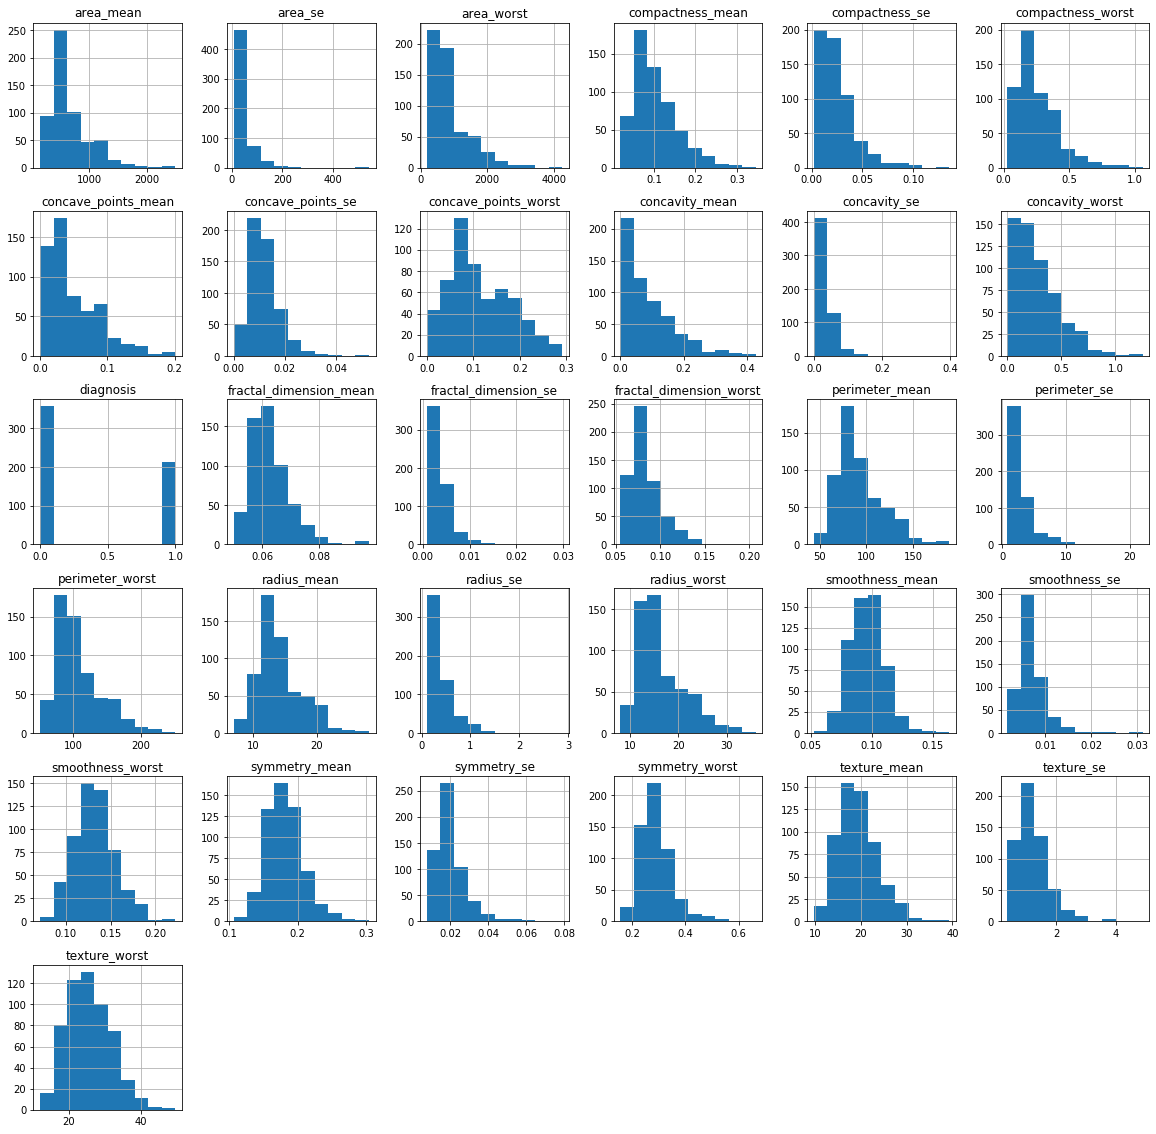

In [47]:
df.hist(figsize = (20,20))
plt.show()

## Heat Map

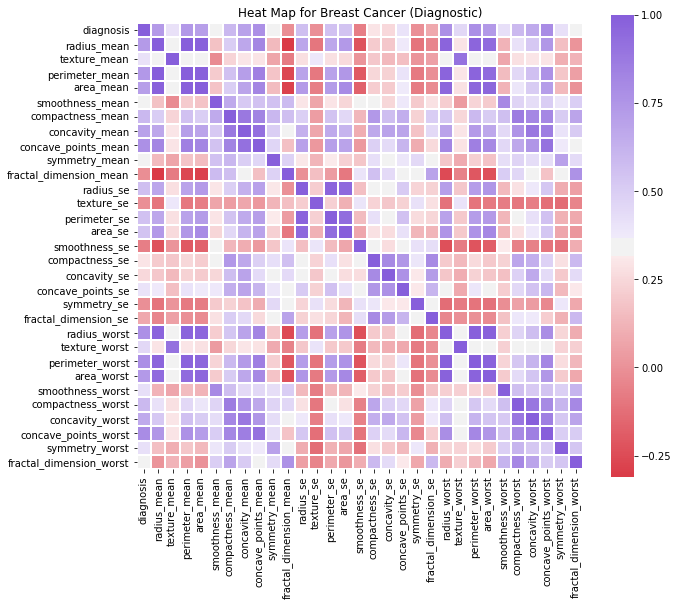

In [59]:
# Correlaion Matrix
corr = df.corr(method = 'pearson')

fig, ax = plt.subplots(figsize = (10,10))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 275, as_cmap =True)

ax.set_title('Heat Map for Breast Cancer (Diagnostic)')
# Draw the heatmap 
sns.heatmap(corr, cmap = cmap, square= True, linewidths = 1, cbar_kws={"shrink": .85})

## Box Plot

Creating a seaborn boxplot using all dependent variables 

In [72]:
def plt_box_plot(data_frame, data_set_name, xlim = None):
    
    fig, ax = plt.subplots(figsize = (10,10))
    
    ax.set_facecolor('#fafafa')
    if xlim is not None:
        plt.xlim(*xlim)
    plt.ylabel('Dependent Variables')
    plt.title("Box Plot of {0} Data Set"\
              .format(data_set_name))
    ax = sns.boxplot(data = data_frame, orient = 'h', palette ='Set2')
    
    plt.show()
    plt.close()

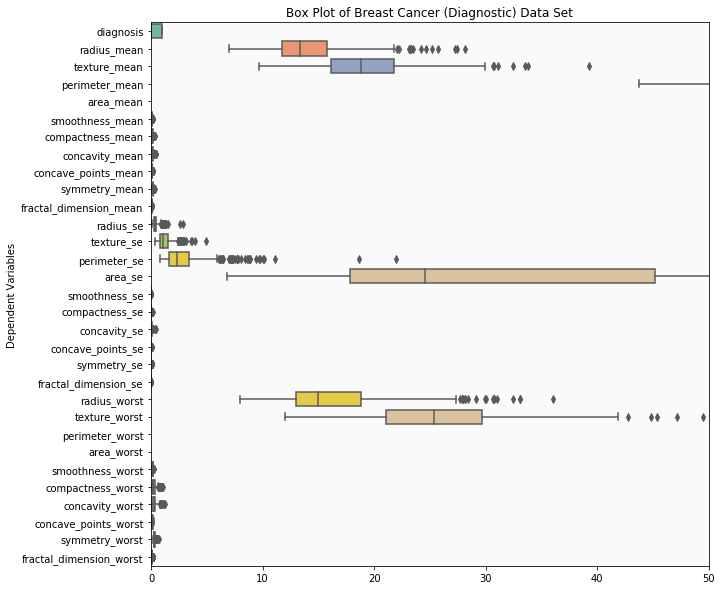

In [73]:
plt_box_plot(df, 'Breast Cancer (Diagnostic)', (-0.05, 50))

In [74]:
def normalize_data_frame(data_frame):
    data_frame_norm = pd.DataFrame()
    
    for col in data_frame:
        if((len(np.unique(data_frame[col])) > 10) & (data_frame[col].dtype!= 'object')):
            data_frame_norm[col] = ((data_frame[col] - data_frame[col].min()) /
                                    (data_frame[col].max() - data_frame[col].min()))
        
        else:
            data_frame_norm[col] = data_frame[col]
    
    return data_frame_norm        

In [75]:
df_norm = normalize_data_frame(df)

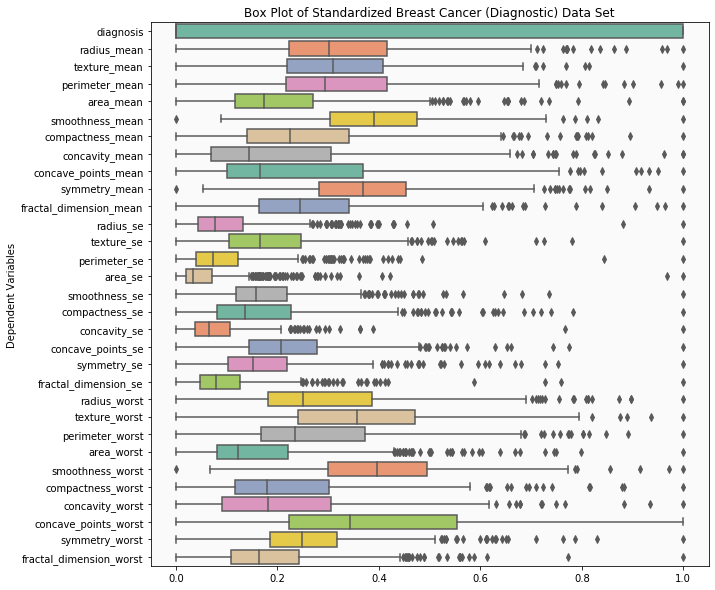

In [81]:
plt_box_plot(df_norm, 'Standardized Breast Cancer (Diagnostic)', (-0.05, 1.05))

## Scatter Plot

Text(0, 0.5, 'area_worst')

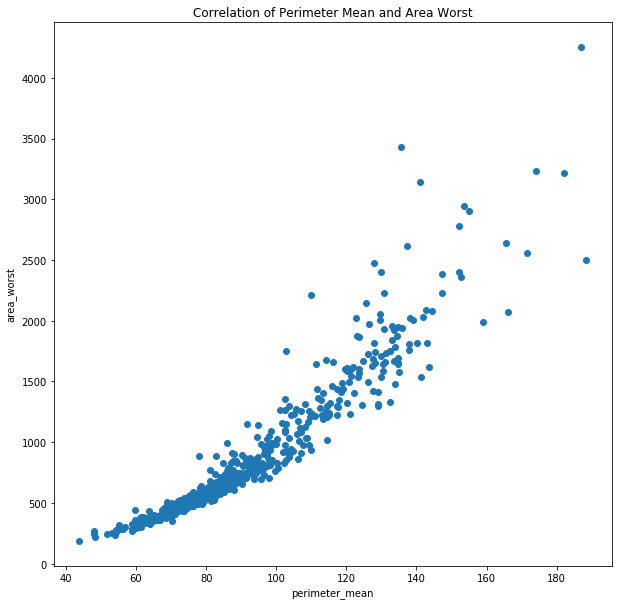

In [84]:
fig, ax = plt.subplots(figsize = (10,10))

for i in range(1):
    x = df['perimeter_mean']
    y = df['area_worst']
    ax.scatter(x,y, label = str(i))

ax.set_title('Correlation of Perimeter Mean and Area Worst')
plt.xlabel('perimeter_mean')
plt.ylabel('area_worst')        

# Creating Training and Test Sets

In [92]:
feature_space = df.iloc[:, df.columns != 'diagnosis']
feature_class = df.iloc[:, df.columns == 'diagnosis']

from sklearn.model_selection import train_test_split
training_set, test_set, class_set, test_class_set = train_test_split(feature_space, feature_class, test_size =0.2, random_state = 0) 

In [93]:
class_set = class_set.values.ravel()
test_class_set = test_class_set.values.ravel()

### Confusion Matrix

In [147]:
## To be used further for checking accuracy 

from sklearn.metrics import classification_report, confusion_matrix

### Creating Confusion Matrix ####
def create_conf_mat(test_class_set, predictions):
    
    if(len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets')
    elif(test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        test_crosstb_comp = pd.crosstab(index = test_class_set, columns = predictions)
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

### PLotting the Confusion Matrix ####    

def plt_map(conf_mat):
    sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Actual vs. Predicted Confusion Matrix')
    plt.show()

### Classification Report

In [148]:
def print_class_report(predictions, clf_name):
    print('Classification Report for {0}:'.format(clf_name))
    print(classification_report(predictions, test_class_set, target_names = dx))

# K Nearest Neighbours Classification 

In [149]:
from sklearn.neighbors import KNeighborsClassifier
k_nn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
k_nn.fit(training_set, class_set)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [98]:
knn_pred = k_nn.predict(test_set)

In [150]:
class_report = print_class_report(knn_pred, 'KNN')

Classification Report for KNN:
              precision    recall  f1-score   support

      Benign       0.94      0.95      0.95        66
   Malignant       0.94      0.92      0.93        48

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



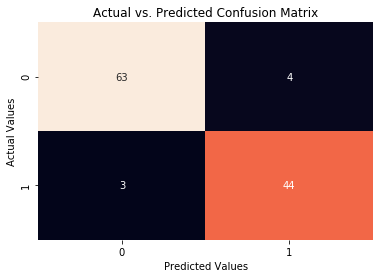

In [151]:
conf_mat = create_conf_mat(test_class_set, knn_pred)
plt_map(conf_mat)

# Support Vector Machine Classifier

In [112]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state= 0)
svc.fit(training_set, class_set)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [113]:
svc_pred = svc.predict(test_set)

In [152]:
class_report = print_class_report(svc_pred, 'SVC')

Classification Report for SVC:
              precision    recall  f1-score   support

      Benign       0.94      0.98      0.96        64
   Malignant       0.98      0.92      0.95        50

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



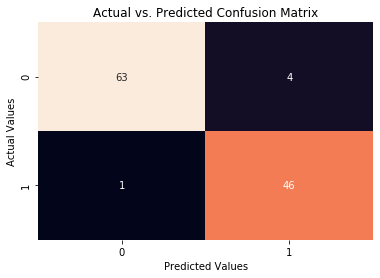

In [141]:
conf_mat = create_conf_mat(test_class_set, svc_pred)
plt_map(conf_mat)

# Decision Tree Classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier
dt =  DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(training_set, class_set)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [124]:
dt_pred = dt.predict(test_set)

In [153]:
class_report = print_class_report(dt_pred, 'Decision Tree')

Classification Report for Decision Tree:
              precision    recall  f1-score   support

      Benign       0.93      0.95      0.94        65
   Malignant       0.94      0.90      0.92        49

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



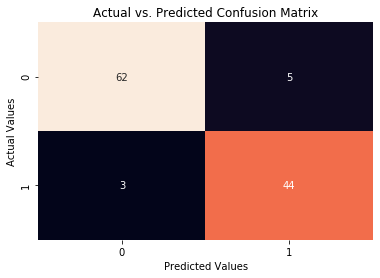

In [142]:
conf_mat = create_conf_mat(test_class_set, dt_pred)
plt_map(conf_mat)

# Random Forest Classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(training_set, class_set)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [131]:
rf_pred = rf.predict(test_set)

In [154]:
class_report = print_class_report(rf_pred, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98        68
   Malignant       0.96      0.98      0.97        46

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



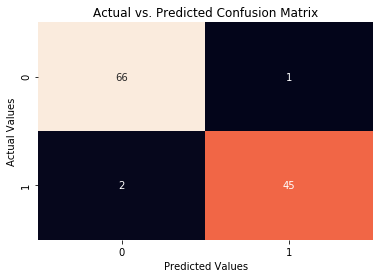

In [143]:
conf_mat = create_conf_mat(test_class_set, rf_pred)
plt_map(conf_mat)

## Conclusion

Out of all the applied Classifiers we get best accuracy from Random Forest

# Scatter Plot Matrix

Red indicates bengin and Purple indicates malignant.

Text(0.5, 0.98, 'Scatter Plot for Breast Cancer (Diagnostic)')

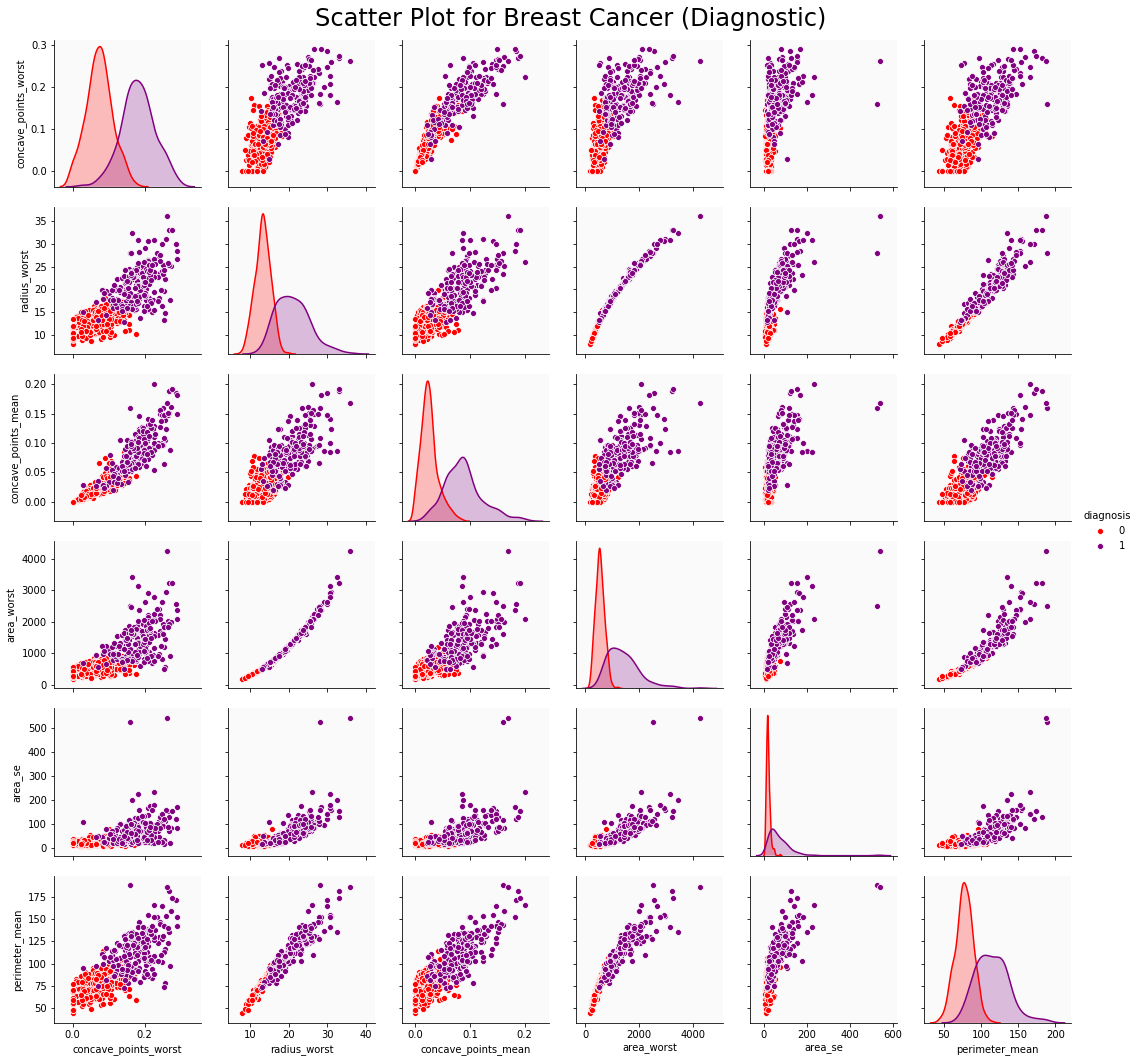

In [158]:
# Variables chosen from Random Forest Modeling
cols = ['concave_points_worst', 'radius_worst', 'concave_points_mean', 'area_worst', 'area_se', 'perimeter_mean']

ax = sns.pairplot(df, vars = cols, hue = 'diagnosis', palette = ('Red','Purple'))

ax.set(facecolor = '#fafafa')
plt.subplots_adjust(top = 0.95)
ax.fig.suptitle('Scatter Plot for Breast Cancer (Diagnostic)', fontsize = 24)